# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [15]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [60]:
df['Positive affect'].max()

155.0

In [63]:
df[df['Positive affect'] == 155.0]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
148,Syria,149,137,155.0,155.0,154.0,153.0,38.0,69.0,NaN,128.0


In [61]:
df['Positive affect'].min()

1.0

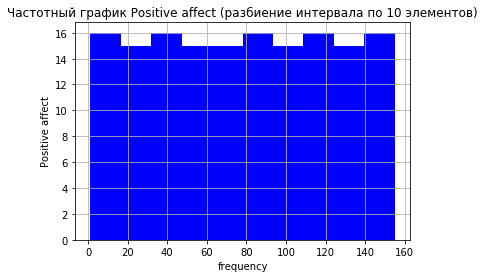

In [71]:
#n, bins, patches = 
plt.hist(df['Positive affect'].dropna(), bins=10, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

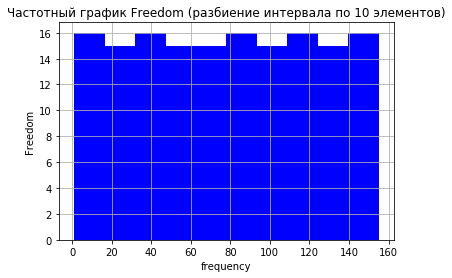

In [72]:
#n, bins, patches = 
plt.hist(df['Freedom'].dropna(), bins=10, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

In [73]:
# Это распределение, похожее на равномерное

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [74]:
# математическое ожидание 
sum(df['Freedom'].dropna())/len(df['Freedom'].dropna())

78.0

In [18]:
print('Медиана: ', statistics.median(df['Freedom']))

Медиана:  71.0


In [77]:
df['Freedom'].unique()

array([   5.,    6.,    3.,    7.,   19.,   11.,   10.,    8.,    9.,
         26.,   17.,   16.,   93.,   28.,   63.,   33.,   44.,   53.,
         62.,   58.,    4.,   12.,   71.,   69.,  102.,   98.,   25.,
         68.,   nan,   95.,   32.,   84.,   30.,   20.,   74.,  132.,
         24.,  108.,   51.,   52.,    1.,  122.,   56.,   13.,   70.,
         50.,   54.,   57.,   81.,   42.,   47.,   18.,  126.,  144.,
         45.,   49.,   40.,   64.,   39.,   80.,   35.,  138.,   34.,
         77.,   61.,   37.,  114.,  107.,   15.,  124.,  128.,   79.,
        139.,   86.,  118.,   66.,   43.,  137.,  140.,   36.,  131.,
        150.,  112.,  105.,   75.,   38.,   83.,  149.,   76.,  101.,
        136.,   48.,   31.,   23.,   59.,   90.,  115.,   91.,  100.,
         67.,   88.,  103.,   92.,  119.,   22.,   85.,   87.,  145.,
          2.,  134.,  121.,   14.,   82.,  111.,  127.,  123.,  117.,
        109.,  104.,   89.,   72.,  151.,   46.,  143.,   27.,  130.,
        125.,  110.,

In [80]:
len(df['Freedom'].unique())

156

In [82]:
set(df['Freedom'].value_counts())

{1}

In [51]:
print('Значение моды: ', statistics.mode(df['Freedom'].dropna()))

StatisticsError: no unique mode; found 155 equally common values

In [83]:
# не получается вывести значение моды, т.к. все значения в выборке уникальны

In [24]:
min(df['Freedom'])

1.0

In [25]:
max(df['Freedom'])

155.0

In [28]:
# выбросы
df['Freedom'].isnull().sum()

1

In [48]:
# стандартное отклонение
statistics.pstdev(df['Freedom'].dropna())

44.74371464239419

In [49]:
# дисперсия
statistics.pvariance(df['Freedom'].dropna())

2002.0

In [32]:
# Разница между макс и мин значениями
Freedom_range = max(df['Freedom']) - min(df['Freedom'])
print(Freedom_range)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

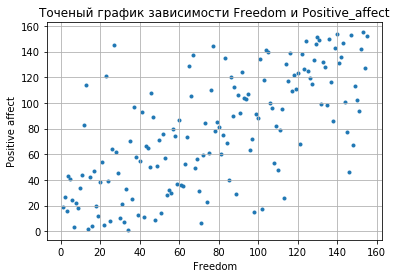

In [91]:
Freedom = df['Freedom']
Positive_affect = df['Positive affect']
plt.scatter(Freedom, Positive_affect, marker= '.')
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точеный график зависимости Freedom и Positive_affect')
plt.grid(True)


Коэффициент корреляции Пирсона: 0.68176984306


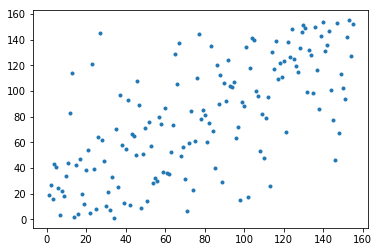

In [97]:
from scipy.stats import pearsonr
x = df['Freedom'].dropna()
y = df['Positive affect'].dropna()
corr, p_value = pearsonr(x,y)
plt.scatter(x, y, marker= '.')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
# корреляция невелика, знак - положительный - говорит о том, что при увеличении значений одного показателя наблюдается рост значений другого

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [99]:
Freedom = df['Freedom'].dropna()
print(statistics.mean(Freedom))

78.0


In [100]:
Freedom_1 = Freedom - statistics.mean(Freedom)
print(statistics.mean(Freedom_1))

0.0


In [101]:
min(Freedom_1)

-77.0

In [102]:
max(Freedom_1)

77.0

In [105]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

Freedom_2 = min_max_scaler.fit_transform(np.array(Freedom_1).reshape(-1,1))
print(min(Freedom_2))
print(max(Freedom_2))

[-1.]
[ 1.]


Построить матрицу корреляций для всех колонок таблицы

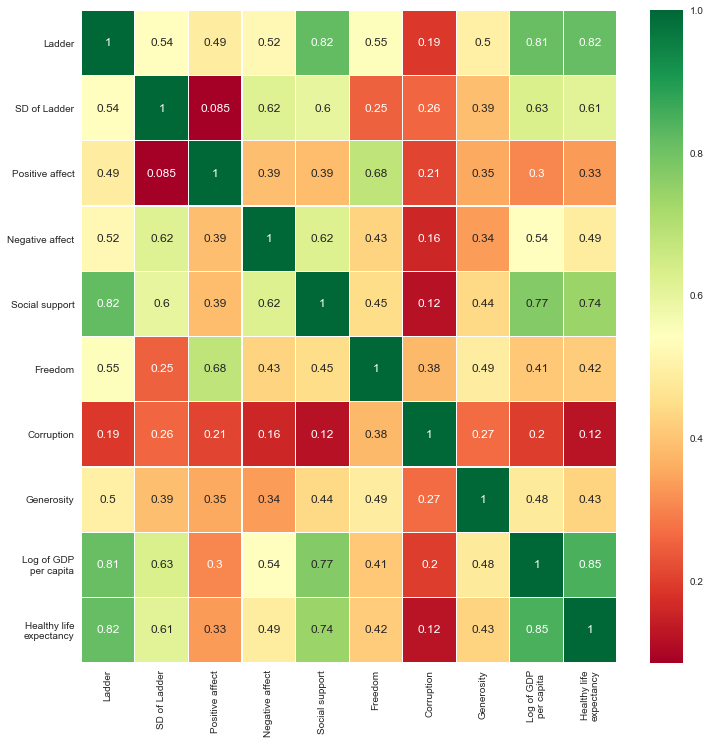

In [107]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [108]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

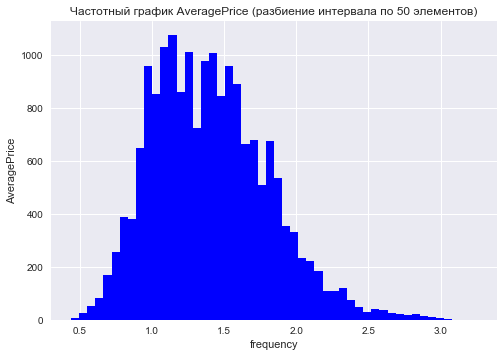

In [118]:
#n, bins, patches = 
plt.hist(df['AveragePrice'].dropna(), bins=50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# Это распределение, близкое к нормальному

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

Коэффициент корреляции Пирсона: -0.208317048488


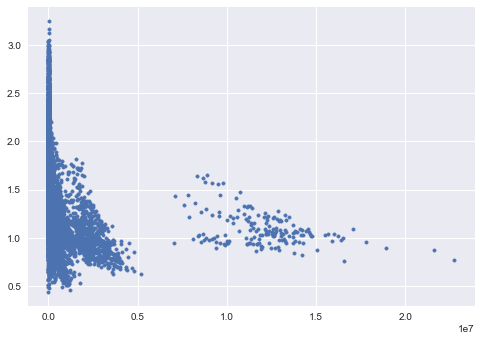

In [121]:
from scipy.stats import pearsonr
x = df['4046'].dropna()
y = df['AveragePrice'].dropna()
corr, p_value = pearsonr(x,y)
plt.scatter(x, y, marker= '.')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
# Корреляция незначительная